<a href="https://colab.research.google.com/github/zohaib-ansari/Sparks-Foundation/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Zohaib Ansari
# THE SPARKS FOUNDATION
# Data Science & Business Analytics
# TASK 1 - Prediction using Supervised ML

In [15]:
# importing the required libraries
import pandas as pd #for reading data and manipulation
import numpy as np #for mathematical calculations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [16]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [17]:
# To check if there is any null value in the Dataset
data.isnull == True

False

# There is no null value in the Dataset , so we can now visualize our Data.

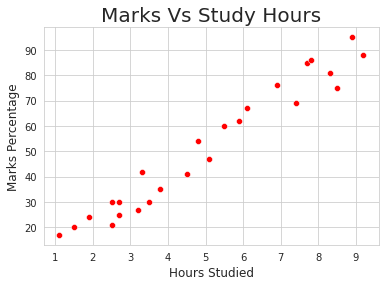

In [18]:
sns.set_style('whitegrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'], color="red")
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score .Lets plot a regression line to confirm the correlation.

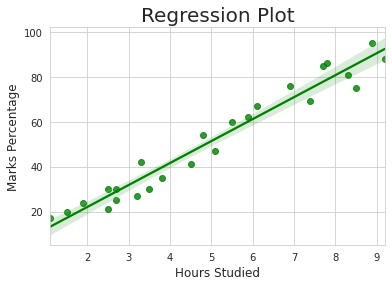

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [19]:
sns.regplot(x= data['Hours'], y= data['Scores'],color="Green")
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated.

# Training the Model / Algorithm

**1. Splitting the Data**

In [20]:
# Divide the data into "attributes" (inputs) and "labels" (outputs).
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

Here we are using 80% of our dataset for training and 20% of the data for testing.


**2. Fitting the Data into the model**

In [22]:
regression  = LinearRegression()  
regression.fit(X_train, y_train) 
print(" Model Trained ..! ")

 Model Trained ..! 


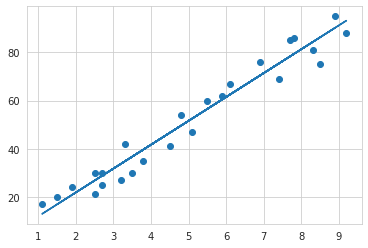

In [23]:
# Plotting the regression line
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Predicting the Percentage of Marks

In [24]:
y_pred = regression.predict(X_test) # Predicting the scores

In [25]:
# Comparing Actual vs Predicted
compare_marks = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare_marks

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [26]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.692 % marks.

# Evaluating the Model

In [27]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean absolute error:  4.183859899002982


Chances of error through the model are very less because of small value of Mean absolute error